In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from pandas import DataFrame as df
import os
import sys
import datetime

sys.path.append(os.path.abspath("../"))
from shibaer import util, features
pd.options.display.float_format = "{:.2f}".format

tprint = lambda s: print('\n--- %s ---' %s)
pprint=lambda i: '%i (%.2f)' %(i,float(i)/len(fraud_events))
hour_diff = lambda i:i.total_seconds()/360 if type(i) is not None else i


    
thumbdrive = 'DATAB'
data_dir = 'ER'
data = util.load_pickle_files(thumbdrive, data_dir, is_small=True)
data_with_targets = features.add_death_columns(data)
target_variables = [d for d in data_with_targets.columns if 'T_' in d]
target_variables

meta_data=util.read_metadata()
numeric_cols = meta_data.loc[meta_data.data_type == 'numeric'].index


Found the following pickle files:  ['small_pickle.pkl']
Loading : small_pickle.pkl
Finished loading data
Total number of rows:  10000


['T_is_dead',
 'T_release_date',
 'T_total_time_hospital',
 'T_mortality_ER',
 'T_mortality_hospitalization',
 'T_mortality_after_hospitalization',
 'T_mortality2d',
 'T_mortality30d',
 'T_mortality60d',
 'T_mortality_type']

In [18]:
def convert_to_numeric(data, numeric_cols = 'all', ignore_strs=['<','>'],convert_str_map= {},meta_data= None):   
    print('converting numeric columns to numeric...')
    data_numeric= data[numeric_cols]
    for st in ignore_strs:
        data_numeric=data_numeric.applymap(lambda s: s.replace(st,'') if type(s)==str else s)
    for st in convert_str_map.keys():
        data_numeric=data_numeric.applymap(lambda s: s.replace(st,convert_str_map[st]) if type(s)==str else s)
    data_numeric = data_numeric.apply(pd.to_numeric, errors='coerce')
    data[numeric_cols] = data_numeric
    return data

def remove_outliers(data, high=0.95, low=0.1, numeric_cols = []):
    if type(numeric_cols) == str:
        meta_data=read_metadata()
        numeric_cols = meta_data.loc[meta_data.data_type == 'numeric'].index
    print('removing outliers from numeric columns...')
    for name in numeric_cols:
        print(name)
        q_low, q_high = data[name].quantile([low, high])
        print(q_low)
        print(q_high)
        low_ind = data[name].loc[data[name] <  q_low ].index
        print(low_ind)
        high_ind= data[name].loc[data[name] >  q_high ].index
        data[name].loc[low_ind]= q_low
        
    return data

#ndata=convert_to_numeric(data, numeric_cols= numeric_cols)
remove_outliers(ndata, numeric_cols=numeric_cols)
ndata.dtypes

converting numeric columns to numeric...
removing outliers from numeric columns...
age_on_date
20.0
88.0
Int64Index([], dtype='int64')
days_in_hospital
2.0
19.0
Int64Index([], dtype='int64')
pain
0.0
8.0
Int64Index([], dtype='int64')
fever
36.4
37.7
Int64Index([], dtype='int64')


/Users/ttron/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


pulse
63.0
114.0
Int64Index([], dtype='int64')
sbp
105.0
175.0
Int64Index([], dtype='int64')
dbp
59.0
96.0
Int64Index([], dtype='int64')
in_room_saturation
93.0
100.0
Int64Index([], dtype='int64')
saturation
94.0
100.0
Int64Index([], dtype='int64')
respiratory_rate
14.0
28.0
Int64Index([], dtype='int64')
WBC
5.63
17.345499999999994
Int64Index([ 25658,   4921, 115165, 106731,   2080, 118401, 104456,  77849,
            122848,  55545,
            ...
              9506, 123384,  34615, 117843,  65604,   2341,  67494,  76885,
             59493,  34595],
           dtype='int64', length=673)
HGB
10.16
15.68
Int64Index([ 25658, 106241,   5978, 119019,  15990,  92615,   3119,  68982,
             31218, 104456,
            ...
             97027,  34615,   6569, 115011,  21382,  64608,  65604,  73669,
            110100,  17766],
           dtype='int64', length=680)
MCV
80.024
96.593
Int64Index([ 25658,  85068, 125478,  76009,  72534,  20295,  29647,  24688,
             12710, 123516,
  

Amylase -Blood
36.0
145.0
Int64Index([ 56758,  43117,  72534,  95483,  42037, 131454,  89753,  60648,
            104762,   2692,
            ...
             43812,  79996, 117843,  77944, 119102, 115011, 124989,  14414,
             17846,   5008],
           dtype='int64', length=318)
Lipase, pancreatic
8.45
113.89999999999999
Int64Index([  5548,  78662,   3730,  57955,  27656,  28066,  50403,  51424,
              2692,   4542,  61021,  96884,  15586,  89419, 124639,  39498,
            112958,  31215,  82033,  32030,   6614,  39903,  57275,   2555,
             17734,  91068,  96672, 119329, 133380,  49801,  52931,  45562,
             27842,  27696,  93471,  38849,  37419,  50356,  21810,  58930,
             57735,  80348,   2838,  96738,  70057,   2467, 102688,  79714,
            123685,   3758, 103776,  41944,  14599,  53066,  91789,  63923,
             75495,  67461,  18593,  95998,  43514,  50906,  37829,  13069,
             49940, 114825,  59733,   1209,  47427,  93066, 

,Albumin -Blood,Alkaline phosphatase -Blood,Amylase -Blood,"Bilirubin -Blood, total",CK-MB%,"CPK -Blood ,total",CPK-MB,CRP (Inflammatory),"Calcium -Blood, total",Chloride -Blood,...,T_is_dead,T_release_date,T_total_time_hospital,T_mortality_ER,T_mortality_hospitalization,T_mortality_after_hospitalization,T_mortality2d,T_mortality30d,T_mortality60d,T_mortality_type
81820,nan,nan,nan,nan,nan,nan,nan,nan,9.40,102.00,...,False,2014-11-20 14:29:00,4 days 20:09:00,False,False,False,False,False,False,0
108439,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,False,2014-05-29 01:13:00,0 days 02:48:00,False,False,False,False,False,False,0
17913,nan,nan,nan,nan,nan,nan,nan,nan,9.90,105.00,...,False,2015-09-16 14:35:00,0 days 03:28:00,False,False,False,False,False,False,0
122163,nan,nan,nan,nan,nan,nan,nan,nan,9.60,105.00,...,False,2016-04-23 22:37:00,0 days 03:55:00,False,False,False,False,False,False,0
95974,nan,nan,nan,nan,nan,nan,nan,nan,9.00,104.00,...,False,2016-03-26 18:57:00,0 days 04:33:00,False,False,False,False,False,False,0
67428,4.60,58.00,nan,0.37,nan,nan,nan,1.20,9.50,97.00,...,True,2017-10-08 17:43:00,0 days 08:26:00,False,False,True,False,False,True,3
57933,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,False,2014-01-15 00:03:00,0 days 13:57:00,False,False,False,False,False,False,0
63554,nan,99.00,125.00,0.74,nan,nan,nan,nan,9.60,105.00,...,False,2015-10-03 16:18:00,0 days 01:20:00,False,False,False,False,False,False,0
105739,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,False,2017-09-30 23:00:00,0 days 02:09:00,False,False,False,False,False,False,0
104903,nan,nan,nan,nan,nan,nan,nan,nan,9.40,106.00,...,False,2015-04-02 22:36:00,0 days 08:36:00,False,False,False,False,False,False,0


In [9]:
meta_data= pd.read_csv(os.path.abspath("../docs/ER/meta_data.csv"), index_col='column_name')
hebrew_map= {'כאב':'pain',
 'חום' :'fever',
 'דופק': 'pulse',
 'לחץ סיסטולי': 'sbp',
 'לחץ דיאסטולי': 'dbp' ,
 'סטורציה באויר חדר': 'in_room_saturation',
 'סטורציה': 'saturation',
 'מספר נשימות' : 'respiratory_rate'}
meta_data = md.rename(hebrew_map,axis=0)

In [3]:
# Visualization funcs
import datetime

def stack_plot(data, index_axis, stack_var='age',title=None, ylim=None):
    if title is None:
        title=stack_var +' by ' + index_axis.dtype
    data[stack_var].groupby(index_axis).value_counts().unstack().plot(kind='bar', 
                                                                      stacked=True, figsize=(20,5), title=title, ylim=ylim)
    
def plot_with_legend(data,group_var='gender', plot_var='age_on_date',drop_values=[]):
    fig, ax = plt.subplots()
    groups = data.groupby(group_var)[plot_var]
    for k, v in groups:
        if k not in drop_values:
            v.hist(label=k, alpha=.75, ax=ax, bins = 40)
    ax.legend()

def plot_time_of_death_from(time_from='admission_date_min', drop_negatives=True, as_time='D', max_period= 1200):
    death_delta= (death_data.death_date - death_data[time_from])/np.timedelta64(1,as_time)
    if drop_negatives:
        death_delta = death_delta.loc[death_delta>0] #remove negative death deltas
    death_delta.loc[death_delta<=max_period].hist(bins=100)
    #death_days_from_admission.hist()
    tprint('Relative time of death after %s (uniqe id_coded) %i-%s '%(time_from,max_period,as_time))
    return death_delta

def remove_outliers(data, high=0.99, low=0.01):
    quant_df = data.quantile([low, high])
    print(quant_df)
    for name in list(quant_df.columns):
        #if quant_df.columns:
            data = data[(data[name] >= quant_df.loc[low, name]) & (data[name] < quant_df.loc[high, name])]
    return data

In [13]:
def convert_to_numeric(data, numeric_cols = 'all', ignore_strs=['<','>']):
    
    if numeric_cols == 'all':  
        numeric_cols = meta_data.loc[md.data_type == 'numeric'].index
        print(numeric_cols)
    data_numeric= data[numeric_cols]
    for st in ignore_strs:
        data_numeric=data_numeric.applymap(lambda s: s.replace(st,'') if type(s)==str else s)
    data_numeric = data_numeric.apply(pd.to_numeric, errors='coerce')
    data[numeric_cols] = data_numeric
    return data

data = convert_to_numeric(data)
ndata.head()

Index(['age_on_date', 'days_in_hospital', 'pain', 'fever', 'pulse', 'sbp',
       'dbp', 'in_room_saturation', 'saturation', 'respiratory_rate', 'WBC',
       'HGB', 'MCV', 'PLT', 'NEUTRO abs.', 'LYMPHO abs.', 'EOS abs.', 'PH',
       'PCO2', 'PO2', 'HCO3', 'Lactate', 'Urea -Blood', 'Creatinine -Blood',
       'Glucose -Blood', 'Potassium -Blood', 'Chloride -Blood',
       'Sodium -Blood', 'Calcium -Blood, total', 'Phosphorus -Blood',
       'Bilirubin -Blood, total', 'SGOT (AST) -Blood', 'SGPT (ALT) -Blood',
       'LDH -Blood', 'Alkaline phosphatase -Blood', 'Gamma GT -Blood',
       'Protein -Blood, total', 'Albumin -Blood', 'Osmolality (calc.)',
       'CPK -Blood ,total', 'CPK-MB', 'CK-MB%', 'Amylase -Blood',
       'Lipase, pancreatic', 'CRP (Inflammatory)', 'Troponin-I', 'INR', 'PT',
       'PTT', 'HbA1C %', 'TSH', 'T4, free', 'T3, free', 'Triglycerides',
       'Cholesterol, total', 'HDL-Cholesterol, direct',
       'LDL Cholesterol, direct'],
      dtype='object', name='column

/Users/ttron/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:2540: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


,Albumin -Blood,Alkaline phosphatase -Blood,Amylase -Blood,"Bilirubin -Blood, total",CK-MB%,"CPK -Blood ,total",CPK-MB,CRP (Inflammatory),"Calcium -Blood, total",Chloride -Blood,...,T_is_dead,T_release_date,T_total_time_hospital,T_mortality_ER,T_mortality_hospitalization,T_mortality_after_hospitalization,T_mortality2d,T_mortality30d,T_mortality60d,T_mortality_type
0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,True,2013-02-19 14:04:00,0 days 08:02:00,False,False,True,False,False,False,3
1,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,True,2013-07-30 17:34:00,2 days 06:26:00,False,True,False,True,True,True,2
2,4.60,114.00,nan,0.46,nan,nan,nan,nan,10.00,104.00,...,False,2013-05-27 13:14:00,0 days 02:20:00,False,False,False,False,False,False,0
3,nan,66.00,36.00,0.29,7.30,193.00,14.10,nan,9.90,nan,...,False,2013-12-10 20:47:00,0 days 02:49:00,False,False,False,False,False,False,0
4,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,False,2013-06-03 14:14:00,4 days 00:49:00,False,False,False,False,False,False,0


84723
24678

--- percent of non-missing values (<90%) ---


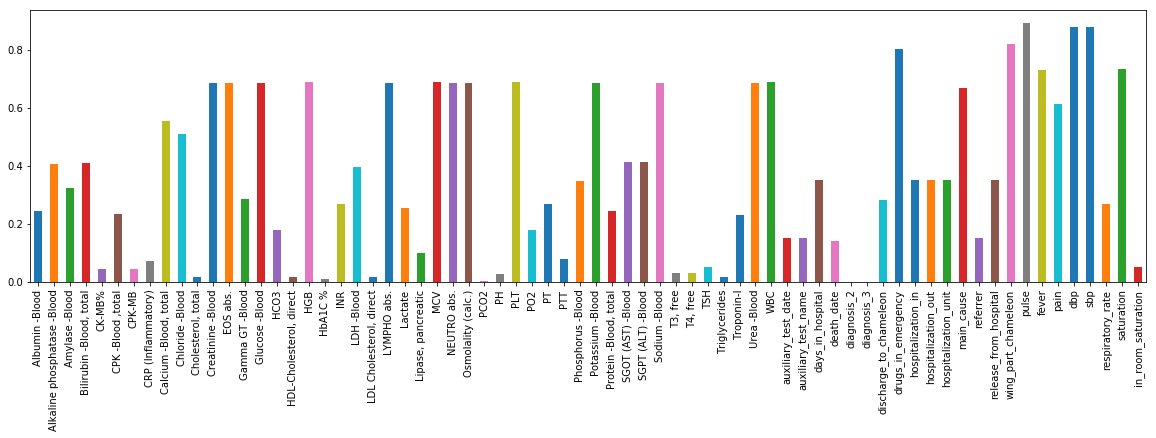

In [265]:
death_data = data_with_targets.loc[data_with_targets.T_is_dead]
print(len(death_data))
death_data = death_data.sort_values('admission_date_min').drop_duplicates(subset =['id_coded'], keep='last')

print(len(death_data))

#dd=plot_time_of_death_from(time_from='T_release_date',max_period=48, as_time='h')
data.columns
percent_missing= data.count()/len(data)
tprint('percent of non-missing values (<90%)')
percent_missing.loc[percent_missing<0.9].plot(kind='bar',figsize=(20,5))

TypeError: Empty 'DataFrame': no numeric data to plot

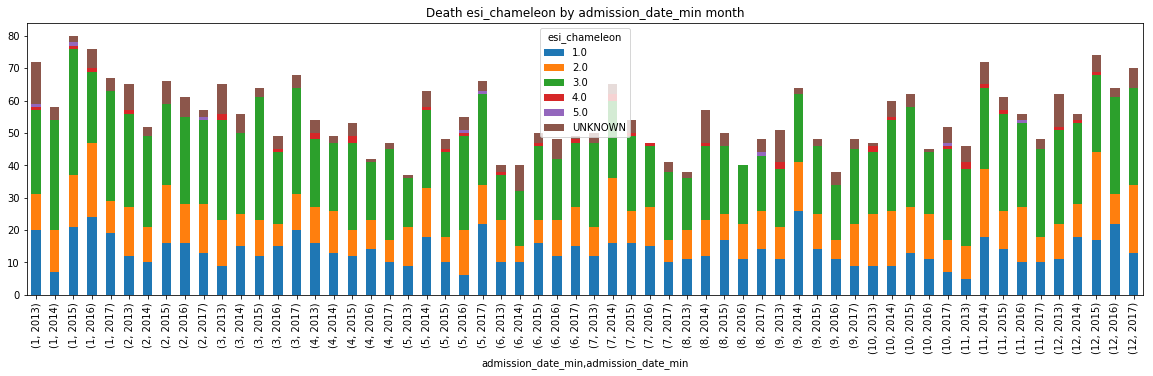

In [275]:
d=data_with_targets
plot_events_by_time(d.loc[d.T_mortality2d], by_time='admission_date_min',stack_var = 'esi_chameleon')

death_data.groupby(['T_mortality2d'])['esi_chameleon'].plot(kind='bar')
#death_data.esi_chameleon.value_counts()
#death_data.groupby().count()['gender'].plot(kind='bar')
#stack_var
#death_data.head()

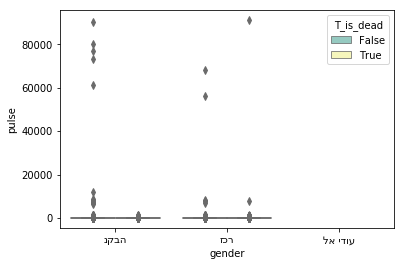

In [251]:
target_cols= ['pulse']
group_by_col = 'T_is_dead'
#clean_data = data_with_targets.loc[datw_with_targets]\
def smart_boxplot(data, filter_var = 'is_hospitalization', remove_outliers = True, group_by_col='T_is_dead', target_cols=['pulse','CPK-MB']):
    data=data.copy()
    data_col=data
    #data.reset_index(inplace=True)
    for t in target_cols:     
        tcol=data[t]
        #tcol=tcol.dropna()
        print(tcol.dtype)
        if remove_outliers:
            tcol= tcol.map({'<10':0})
            q=tcol.dropna().astype(float).quantile(0.99)
            data_col= data_col.loc[tcol <= q]
            data_col.head()
            #print(tcol.dtype)
            #print((tcol>tcol.quantile(0.99)).value_counts())
            #col_ind = remove_outliers(tcol).index
             # all columns including t
        data_col.loc[data_col[filter_var]].boxplot(by=group_by_col,column=t)
        
ax = sns.boxplot(x="gender", y="pulse", hue="T_is_dead",
                 data=data_with_targets, palette="Set3")
#data_with_targets.groupby(group_by_col).describe().T

#plot_with_legend(death_data)
#plot_with_legend(data_with_targets, group_var='T_is_dead', plot_var='age_on_date',drop_values=[] )
#data_col.
#smart_boxplot(data_with_targets)



## Descriptive Statistics

In [316]:
md= pd.read_csv(os.path.abspath("../docs/ER/meta_data.csv"))
md= md.loc[md.is_load==1]

data_timestamp_index = 'rss_timestamp'
#print(md.head())
print('\n---- ER data categories : ------')
print(md.groupby('category').nunique()['column_name'])
print('\n---- When was the  data gathered : ------')
print(md.groupby('when (b=before, a=after)').nunique()['column_name'])

demographic_cols = md.loc[md.category == 'demographic']['column_name']\
demographic_data = data[demographic_cols]
lab_cols = md.loc[md.category == 'Labs']['column_name']
tprint('demographic details (all)')

pd.options.display.float_format = "{:.2f}".format


def plot_with_legend(data,group_var='gender', plot_var='age_on_date',drop_values=[]):
    fig, ax = plt.subplots()
    groups = data.groupby(group_var)[plot_var]
    for k, v in groups:
        if k not in drop_values:
            v.hist(label=k, alpha=.75, ax=ax, bins = 40)
    ax.legend()
#demographic_data.groupby('gender').plot(kind='bar')
#[])

#demographic_data['gender'].value_counts())
print(lab_cols)


---- ER data categories : ------
category
Clinical evaluation             10
Labs                            47
Medical background               5
Outcome                         19
Outcome + Medical background     1
demographic                      4
Name: column_name, dtype: int64

---- When was the  data gathered : ------
when (b=before, a=after)
a    20
b    17
Name: column_name, dtype: int64

--- demographic details (all) ---
77                             WBC
79                             HGB
81                             MCV
83                             PLT
85                     NEUTRO abs.
87                     LYMPHO abs.
89                        EOS abs.
91                              PH
93                            PCO2
95                             PO2
97                            HCO3
99                         Lactate
101                    Urea -Blood
103              Creatinine -Blood
105                 Glucose -Blood
107               Potassium -Blood
109 

## where were people commited?

In [4]:
tprint('commited units:')
print(fraud_events.fraud_type.value_counts())    
    
nunique=fraud_events.nunique()
ncount=fraud_events.count()
nnunique=pd.concat([ncount,nunique],axis=1)
nnunique.columns=[ 'count','unique vals']
tprint('Number of values in each fraud label column:')
print(nnunique.loc[label_cols].applymap(pprint))#.applymap(pprint))
tprint('Number of values in each rss_data column:')
print(nnunique.loc[relevant_data_cols].applymap(pprint))

f


--- commited units: ---


NameError: name 'fraud_events' is not defined

In [6]:
death_data=data_with_targets[data_with_targets.T_is_dead==True]
death_data.

['T_is_dead',
 'T_release_date',
 'T_total_time_hospital',
 'T_mortality_ER',
 'T_mortality_hospitalization',
 'T_mortality2d',
 'T_mortality30d',
 'T_mortality60d']